## Data Load

In [86]:
df = pd.read_csv('./data/combined_data_set.csv')

We will want to break the 'Date' column down into its components for further and EDA, and to have a more robust data set for modeling. 

In [87]:
df.head()

,Unnamed: 0,Category,Descript,DayOfWeek,PdDistrict,Resolution,X,Y,geometry,neighbourhood,Month,Day,Year,Hour,Morning,Afternoon,Evening,Overnight,Target
0,0,EMBEZZLEMENT,"EMBEZZLEMENT, GRAND THEFT BY EMPLOYEE",Friday,INGLESIDE,NONE,-122.450297,37.709552,POINT (-122.4502971977728 37.70955194084215),Crocker Amazon,1,1,2016,0,0,0,0,1,specialty_support
1,1,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Friday,CENTRAL,NONE,-122.414167,37.808420,POINT (-122.4141665150933 37.80841991727097),Fishermans Wharf,1,1,2016,13,0,1,0,0,police_non_urgent
2,2,LARCENY/THEFT,GRAND THEFT FROM A BUILDING,Friday,BAYVIEW,NONE,-122.398745,37.730854,POINT (-122.3987447553861 37.73085402180737),Silver Terrace,1,1,2016,0,0,0,0,1,police_non_urgent
3,3,EMBEZZLEMENT,"EMBEZZLEMENT, GRAND THEFT",Friday,BAYVIEW,NONE,-122.388753,37.740736,POINT (-122.3887530469972 37.74073605483584),Bayview,1,1,2016,12,0,1,0,0,specialty_support
4,4,NON-CRIMINAL,CASE CLOSURE,Friday,CENTRAL,UNFOUNDED,-122.420535,37.806189,POINT (-122.4205346782714 37.8061892244521),Aquatic Park / Ft. Mason,1,1,2016,12,0,1,0,0,specialty_support


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301007 entries, 0 to 301006
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     301007 non-null  int64  
 1   Category       301007 non-null  object 
 2   Descript       301007 non-null  object 
 3   DayOfWeek      301007 non-null  object 
 4   PdDistrict     301007 non-null  object 
 5   Resolution     301007 non-null  object 
 6   X              301007 non-null  float64
 7   Y              301007 non-null  float64
 8   geometry       301007 non-null  object 
 9   neighbourhood  301007 non-null  object 
 10  Month          301007 non-null  int64  
 11  Day            301007 non-null  int64  
 12  Year           301007 non-null  int64  
 13  Hour           301007 non-null  int64  
 14  Morning        301007 non-null  int64  
 15  Afternoon      301007 non-null  int64  
 16  Evening        301007 non-null  int64  
 17  Overnight      301007 non-nul

<!-- We also want to break the hours down into periods of a day for more interpretability during EDA. -->

In [89]:
df['Target'].value_counts()

police_non_urgent    190501
specialty_support     65110
police                45396
Name: Target, dtype: int64

## Visual Exploratory Data Analysis

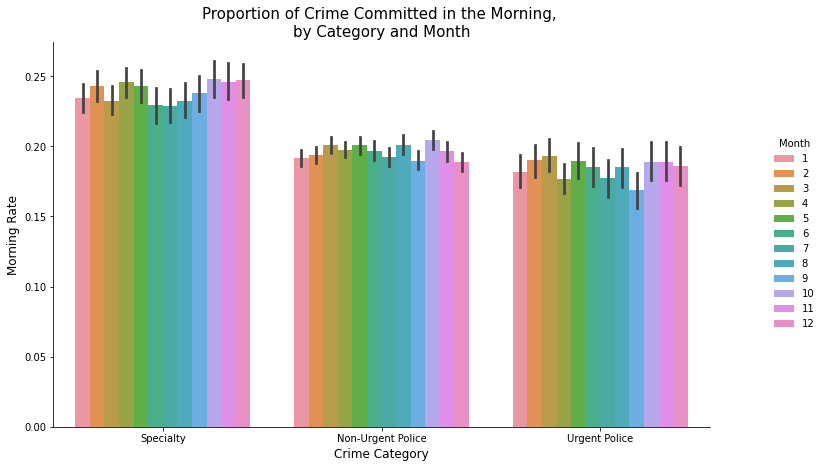

In [90]:
g = sns.catplot(x="Target", y="Morning", hue="Month", kind="bar", data=df)
g.fig.set_figwidth(12)
g.fig.set_figheight(6)
plt.xticks(ticks=[0,1,2], labels=['Specialty', 'Non-Urgent Police', 'Urgent Police'])
plt.xlabel('Crime Category', fontsize=12)
plt.ylabel('Morning Rate', fontsize=12)
plt.title('Proportion of Crime Committed in the Morning, \nby Category and Month', fontsize=15);

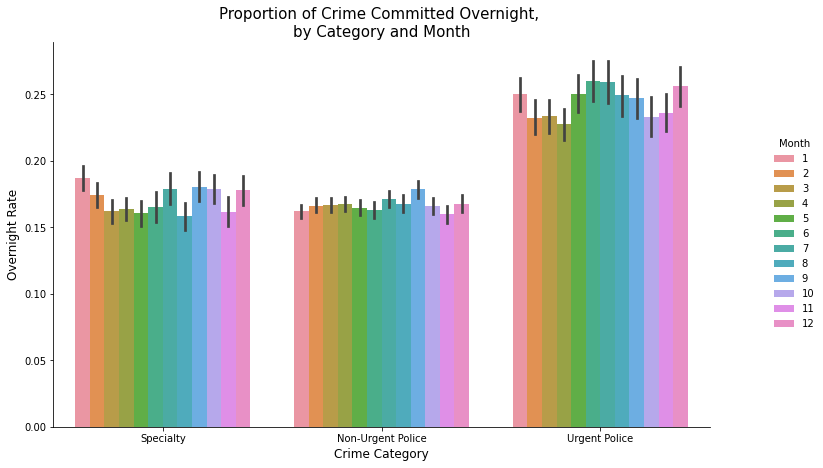

In [91]:
g = sns.catplot(x="Target", y="Overnight", hue="Month", kind="bar", data=df)
g.fig.set_figwidth(12)
g.fig.set_figheight(6)
plt.xticks(ticks=[0,1,2], labels=['Specialty', 'Non-Urgent Police', 'Urgent Police'])
plt.xlabel('Crime Category', fontsize=12)
plt.ylabel('Overnight Rate', fontsize=12)
plt.title('Proportion of Crime Committed Overnight, \nby Category and Month', fontsize=15);

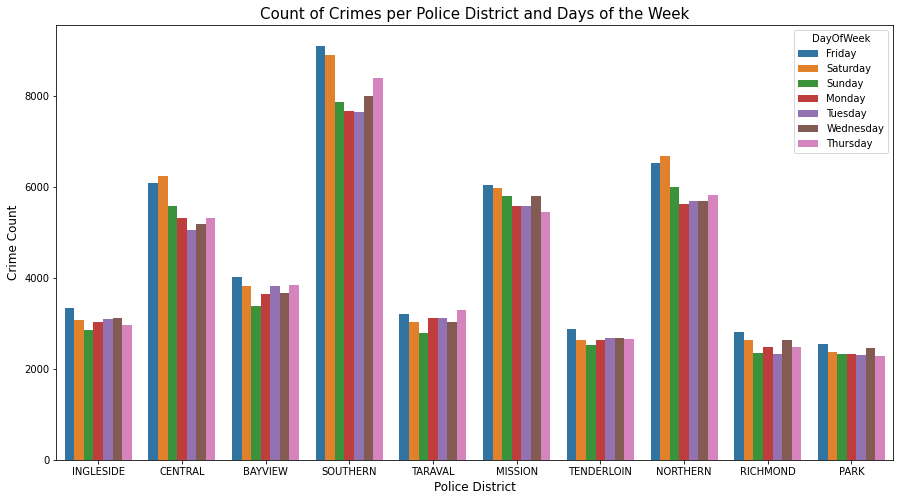

In [92]:
fig_size = (15, 8)
fig, ax = plt.subplots(figsize=fig_size)
sns.countplot(x="PdDistrict", hue="DayOfWeek", data=df);
plt.xlabel('Police District', fontsize=12)
plt.ylabel('Crime Count', fontsize=12)
plt.title('Count of Crimes per Police District and Days of the Week', fontsize=15);

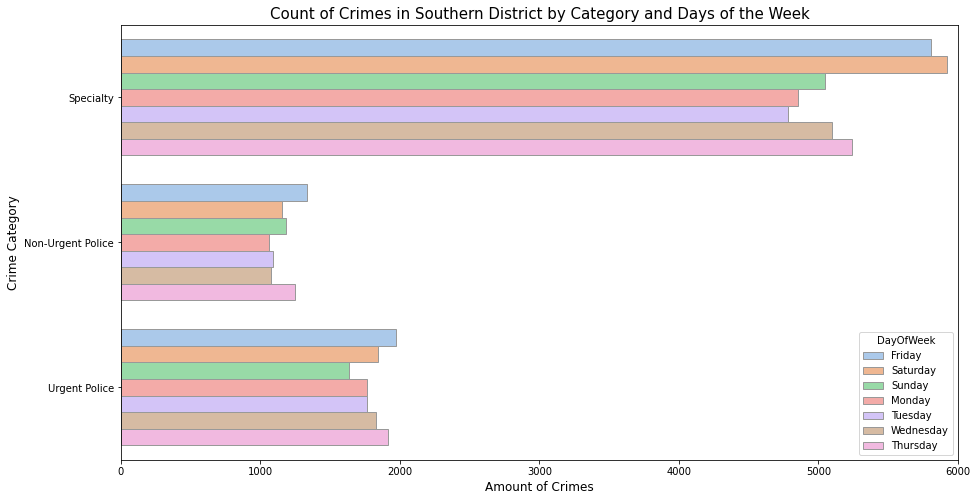

In [93]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(y="Target", hue="DayOfWeek",
            palette="pastel", edgecolor=".6",
            data=df[df['PdDistrict'] == 'SOUTHERN'], ax=ax)
plt.xlim([0, 6000])
plt.yticks(ticks=[0,1,2], labels=['Specialty', 'Non-Urgent Police', 'Urgent Police'])
plt.xlabel('Amount of Crimes', fontsize=12)
plt.ylabel('Crime Category', fontsize=12)
plt.title('Count of Crimes in Southern District by Category and Days of the Week', fontsize=15);

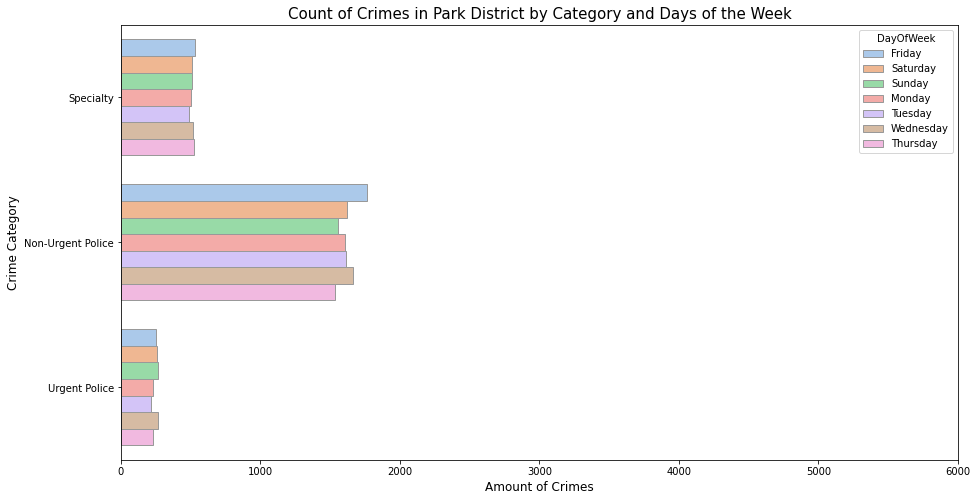

In [94]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(y="Target", hue="DayOfWeek",
            palette="pastel", edgecolor=".6",
            data=df[df['PdDistrict'] == 'PARK'], ax=ax)
plt.xlim([0, 6000])
plt.yticks(ticks=[0,1,2], labels=['Specialty', 'Non-Urgent Police', 'Urgent Police'])
plt.xlabel('Amount of Crimes', fontsize=12)
plt.ylabel('Crime Category', fontsize=12)
plt.title('Count of Crimes in Park District by Category and Days of the Week', fontsize=15);

## Preprocessing

In [95]:
# Converting year to a string as to not skew the modeling
df['Year'] = df['Year'].astype(str)

##### Instantiating X, y

In [96]:
# Creating list of columns to drop
drops = ['Category', 'Descript', 'Resolution', 'Morning', 'Afternoon', 'Evening',
         'Overnight', 'Target', 'geometry', 'X', 'Y', 'Unnamed: 0', 'PdDistrict']

# Dropping columns from data frame and dummifying categorical columns
X = df.drop(columns=drops)
X = pd.get_dummies(data=X, drop_first=True)

# Creating target variable
#
# Label Enconding taken from user Luca Massaron's response to the question at the link below:
# https://stackoverflow.com/questions/50201315/is-numerical-encoding-necessary-for-the-target-variable-in-classification
y = df['Target']
label_encoder = LabelEncoder().fit(y)
y = label_encoder.transform(y)

# Instantiating a random state variable for universal use
rand_st = 1920

#### Train/Test Split

In [97]:
df.head()

,Unnamed: 0,Category,Descript,DayOfWeek,PdDistrict,Resolution,X,Y,geometry,neighbourhood,Month,Day,Year,Hour,Morning,Afternoon,Evening,Overnight,Target
0,0,EMBEZZLEMENT,"EMBEZZLEMENT, GRAND THEFT BY EMPLOYEE",Friday,INGLESIDE,NONE,-122.450297,37.709552,POINT (-122.4502971977728 37.70955194084215),Crocker Amazon,1,1,2016,0,0,0,0,1,specialty_support
1,1,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Friday,CENTRAL,NONE,-122.414167,37.808420,POINT (-122.4141665150933 37.80841991727097),Fishermans Wharf,1,1,2016,13,0,1,0,0,police_non_urgent
2,2,LARCENY/THEFT,GRAND THEFT FROM A BUILDING,Friday,BAYVIEW,NONE,-122.398745,37.730854,POINT (-122.3987447553861 37.73085402180737),Silver Terrace,1,1,2016,0,0,0,0,1,police_non_urgent
3,3,EMBEZZLEMENT,"EMBEZZLEMENT, GRAND THEFT",Friday,BAYVIEW,NONE,-122.388753,37.740736,POINT (-122.3887530469972 37.74073605483584),Bayview,1,1,2016,12,0,1,0,0,specialty_support
4,4,NON-CRIMINAL,CASE CLOSURE,Friday,CENTRAL,UNFOUNDED,-122.420535,37.806189,POINT (-122.4205346782714 37.8061892244521),Aquatic Park / Ft. Mason,1,1,2016,12,0,1,0,0,specialty_support


In [98]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    stratify=y,
    random_state=rand_st
)

#### Scaling Features

In [99]:
ss =StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

#### Defining Function for Displaying Model Scores

In [100]:
# Function to display model metrics
def score_disp(X_train, X_test, y_train, y_test, gs):
    best_score = gs.best_score_
    train_score = gs.score(X_train, y_train)
    test_score = gs.score(X_test, y_test)

    print(f'best score: {best_score}')
    print(f'train score: {train_score}')
    print(f'test score: {test_score}')
    print(f'best params: \n{gs.best_params_}')

## Modeling

#### Baselines

First we need to check our baseline scores so we can compare them with our models' accuracy. You can see that we have largely unbalanced classes. We'll initally check our model without bootstrapping to see how it performs.

In [101]:
df['Target'].value_counts(normalize=True)

police_non_urgent    0.632879
specialty_support    0.216307
police               0.150814
Name: Target, dtype: float64

#### Trying out model without bootstrapping

In [102]:
%%time
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train, y_train)

CPU times: user 7min 51s, sys: 25 s, total: 8min 16s
Wall time: 4min 30s


/Users/gcano01/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000)

In [103]:
lr.score(X_train, y_train)

0.6327597008125142

In [104]:
lr.score(X_test, y_test)

0.6324374605494834

In these preliminary trials, it was discovered our model predicted a constant value for all predictions. The constant value was the value of our highest weighted class, or 'police_non_urgent', so our model's accuracy matched the baseline accuracy exactly. This means our model did not learn anything new about our data, so we will proceed with bootsrapping.

#### Using Bootstrapping

Class=2, n=190501 (33.333%)
Class=1, n=190501 (33.333%)
Class=0, n=190501 (33.333%)


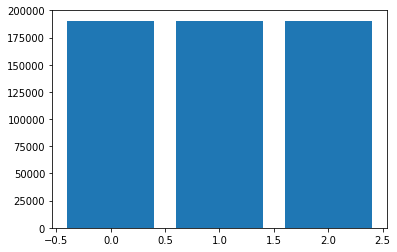

In [105]:
# The code below for implementing SMOTE was taken from the online tutorial at the link below:
# https://machinelearningmastery.com/multi-class-imbalanced-classification/

# Oversampling the two smaller classes to balance the target variable
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

Ah - rejoice! Our target class is now balanced and we can check a basic Logistic Regression model to see if this will be a better fit.

In [106]:
# Train test splitting on the bootstrapped data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    stratify=y,
    random_state=rand_st
)

#### Check Logistic Regression real quick

In [107]:
%%time
# Fitting on unscaled data
lr = LogisticRegression(max_iter=3000)
lr.fit(X_train, y_train)
lr_train = lr.score(X_train, y_train)
lr_test = lr.score(X_test, y_test)

CPU times: user 19min 41s, sys: 1min, total: 20min 42s
Wall time: 10min 55s


In [108]:
print(f'train score: {lr_train}')
print(f'test score: {lr_test}')

train score: 0.5256841610590623
test score: 0.5238989565531843


The above scores are looking much better than the un-bootstrapped data. Our testing score is now ~20% higher than the bootstrapped baseline of 33%. We can now proceed with fitting and scoring the rest of our models.

KNN was explored in preliminary analysis, but it proved to be computationally expensive while providing underwhelming results. So it was omitted from further analysis.

In [111]:
%%time
# Fitting classification models
bag = BaggingClassifier()
bag.fit(X_train, y_train)
bag_train = bag.score(X_train, y_train)
bag_test = bag.score(X_test, y_test)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_train = rf.score(X_train, y_train)
rf_test = rf.score(X_test, y_test)

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
ada_train = ada.score(X_train, y_train)
ada_test = ada.score(X_test, y_test)

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_train = xgb.score(X_train, y_train)
xgb_test = xgb.score(X_test, y_test)

CPU times: user 44min 26s, sys: 58.3 s, total: 45min 24s
Wall time: 23min 52s


In [112]:
# Creating data frame for visualization of results
model = ['Logistic Regression', 'Bagging', 'Random Forest', 'AdaBoost', 'XGBoost']
train = [lr_train, bag_train, rf_train, ada_train, xgb_train]
test = [lr_test, bag_test, rf_test, ada_test, xgb_test]
results = pd.DataFrame({'model': model, 'train_score': train, 'test_score': test})
results

,model,train_score,test_score
0,Logistic Regression,0.525684,0.523899
1,Bagging,0.841761,0.660241
2,Random Forest,0.850007,0.668803
3,AdaBoost,0.491331,0.488828
4,XGBoost,0.547121,0.535885


The Bagging and Random Forest classifiers have the highest accuracy, but they are exceptionally overfit. The XGBoost and Logistic Regression classifiers deliver better-than-baseline accuracy while maintaing a bias/variance balance. As the scores are so close, we will move forward using both models for interpretations of our feature weights and coefficients. For convienience, we will use XGBoost for interpretation of the feature weights, and Logistic Regression for interpretation of the coefficients.

In [118]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_train = xgb.score(X_train, y_train)
xgb_test = xgb.score(X_test, y_test)

In [119]:
27852 + 5980

33832

In [120]:
df[df['neighbourhood'] == 'South of Market']['Target'].value_counts()

police_non_urgent    27852
specialty_support     9184
police                5980
Name: Target, dtype: int64

In [121]:
df[df['neighbourhood'] == 'Treasure Island']['Target'].value_counts()

police_non_urgent    16
police                5
specialty_support     4
Name: Target, dtype: int64

In [122]:
df[df['PdDistrict'] == 'RICHMOND']['Target'].value_counts()

police_non_urgent    12280
specialty_support     3882
police                1561
Name: Target, dtype: int64

In [123]:
# Using eli5 library to display feature weights
eli5.show_weights(xgb, top=132, target_names=X.columns)

Weight,Feature
0.0153,neighbourhood_South of Market
0.0137,neighbourhood_Downtown / Union Square
0.0137,neighbourhood_Chinatown
0.0135,neighbourhood_Western Addition
0.0124,neighbourhood_Fishermans Wharf
0.0124,neighbourhood_Eureka Valley
0.0123,neighbourhood_Outer Sunset
0.0122,neighbourhood_Castro
0.0121,neighbourhood_Civic Center
0.0120,neighbourhood_Mint Hill


The feature weights shown above convey which features contribute the most to classifying our targets accuratley. It makes sense the South of Market neighborhood would contribute the most to correct predictions as it has one of the highest counts of crime incidents. Inversely, Treasure Island contributes nothing to the model and also has one of the lowest counts of  crime incidents.

In [124]:
df[df['neighbourhood'] == 'South of Market'].groupby('neighbourhood')['Target'].value_counts()

neighbourhood    Target           
South of Market  police_non_urgent    27852
                 specialty_support     9184
                 police                5980
Name: Target, dtype: int64

In [125]:
df[df['neighbourhood'] == 'Treasure Island'].groupby('neighbourhood')['Target'].value_counts()

neighbourhood    Target           
Treasure Island  police_non_urgent    16
                 police                5
                 specialty_support     4
Name: Target, dtype: int64

### Coefficients

In [126]:
lr = LogisticRegression(max_iter=3000)

In [127]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [128]:
# Reversing the LabelEncoder to determine target categories
col_names = label_encoder.inverse_transform(lr.classes_)
col_names

array(['police', 'police_non_urgent', 'specialty_support'], dtype=object)

In [129]:
# Creating data frame for plotting of coefficients
weight_df = pd.DataFrame(lr.coef_.T)
weight_df['name'] = X.columns
weight_df.columns = ['specialty_support', 'police', 'police_non_urgent', 'features']
weight_df = weight_df.loc[:, ['features', 'police', 'police_non_urgent', 'specialty_support']]

In [130]:
# Sorting by 'police' target category
weight_df.sort_values(by='police')[:]

,features,police,police_non_urgent,specialty_support
1,Day,0.001671,-0.002629,0.000958
0,Month,0.006298,-0.006532,0.000234
2,Hour,0.014718,-0.007670,-0.007047
125,Year_2018,0.101802,-0.097466,-0.004335
124,Year_2017,0.154595,-0.084078,-0.070517
...,...,...,...,...
27,neighbourhood_Corona Heights,4.012516,-1.366575,-2.645941
11,neighbourhood_Aquatic Park / Ft. Mason,4.091713,-1.648786,-2.442927
111,neighbourhood_Sutro Heights,4.099505,-1.736014,-2.363491
31,neighbourhood_Dogpatch,4.120900,-1.790163,-2.330737


The above coefficients can represent the log odds of that category's prediction being true. For instance, if a crime occurs in Clarendon Heights, you have a higher probability of predicting if the crime was related to non-urgent police. To go further, if you were to predict the type of crime based on the day, you would have very low probability of being correct.

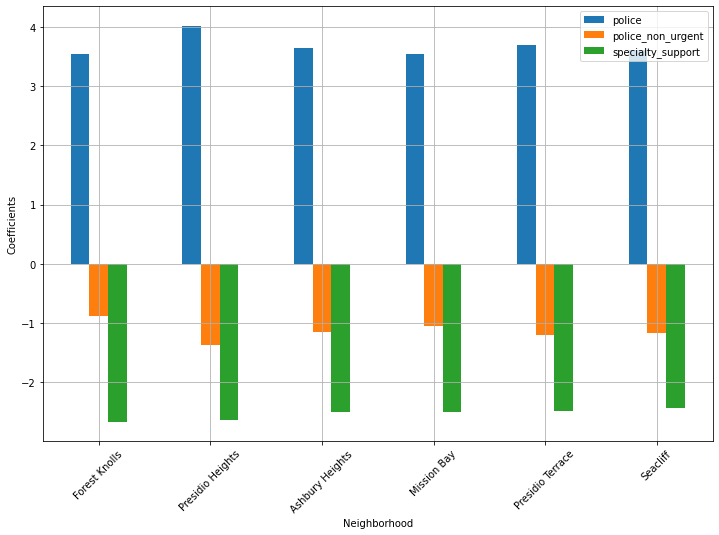

In [131]:
# Plotting coefficients for first six neighborhoods.
ax1 = weight_df.sort_values(by='specialty_support')[:6].plot(kind='bar', figsize=(12, 8))
ax1.set_xlabel('Neighborhood')
ax1.set_ylabel('Coefficients')
ax1.set_xticklabels(['Forest Knolls', 'Presidio Heights', 'Ashbury Heights',
                     'Mission Bay', 'Presidio Terrace', 'Seacliff'],
                     rotation=45);
ax1.grid()

The above plot of coefficients shows our somewhat arbitray categories do not correlate with each other. What we would want to see is the 'police' and 'non-urgent police' coefficients to point in the same direction. Instead, the non-urgent police is in a category of its own. This implies further review and study of spliiting the categoris into parent categories will need to be cokmpleted.

### Model Summary

In summary, we tried several iterations of models but decided to move forward with XGBoost and Logisitc Regression. They both proved to be easy to use, have bias/variance balance, and good accuracy. We saw with the feasture weights that some neighborhoods did not contribute at all to making correct predictions, but this can be addressed using the model coefficients. The coefficients give you a type of confidence metric to assess how accurate your predictions would be for any given feature or neighborhood.